<a href="https://colab.research.google.com/github/rpasquini/econometria/blob/main/OLS%20dummys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('https://github.com/rpasquini/herramientas-econometricas/blob/main/datos/eah2016_individual.csv?raw=true')

In [ ]:
df.head(10)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentes_2,p5_2,p6_a,...,s8,sn14,sn16,s28,s29,fexp,sexotexto,inmigrante,logingreso,dsex
0,1,1,1,13,resto ciudad,18,mujer,1,6,95,...,2,0,Excelente,2,0,973,mujer,nativo arg,8.384804,1
1,2,1,1,1,resto ciudad,18,varon,1,6,95,...,2,0,Excelente,0,0,115,varon,inmigrante,9.104980,0
2,3,1,1,6,inquilinatos hoteles inmuebles tomados,18,mujer,1,6,95,...,2,0,Excelente,2,0,223,mujer,inmigrante,8.482602,1
3,4,1,1,14,resto ciudad,18,varon,1,6,95,...,2,0,Excelente,0,0,421,varon,nativo arg,9.615806,0
4,5,1,1,2,resto ciudad,18,varon,1,6,95,...,2,0,Bueno,0,0,199,varon,nativo arg,9.615806,0
5,6,1,1,13,resto ciudad,18,mujer,1,6,95,...,2,0,Bueno,2,0,314,mujer,nativo arg,8.612503,1
6,6,1,2,13,resto ciudad,24,varon,7,6,95,...,2,0,Excelente,0,0,314,varon,nativo arg,9.798127,0
7,7,1,1,7,resto ciudad,18,mujer,1,3,95,...,2,0,Bueno,1,2,272,mujer,nativo arg,7.901007,1
8,7,1,2,7,resto ciudad,2,varon,3,0,95,...,2,0,Excelente,0,0,272,varon,nativo arg,NaN,0
9,7,1,3,7,resto ciudad,1,varon,3,0,95,...,2,0,Excelente,0,0,272,varon,nativo arg,NaN,0


In [ ]:
df.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentes_2', 'p5_2', 'p6_a', 'p6_b', 'estado', 'categori', 't13',
       't14', 't18', 't28', 't29', 't29a', 't30', 'sem_hs', 't33', 't34',
       't35', 't37_cod_2', 't37_coda_2', 't38', 't39', 't40', 't41_cod_2',
       't47', 't48', 't51_bis', 'i1', 'i4', 'i6_3', 'i10', 'i11', 'codioph',
       'ioph_2', 'codioph_neto', 'ioph_neto_2', 'codios', 'ios_2', 'codioa',
       'ioa_2', 'codlab', 'inglab_2', 'codi3_1x', 'i3_1x_2', 'codi3_2x',
       'i3_2x_2', 'codi3_8x', 'i3_8x_2', 'codi3_est', 'i3_est_2', 'codi3_otr',
       'i3_otr_2', 'codnolab', 'ingnolab_2', 'coding', 'ingtot_2', 'codi_tot',
       'itfb_2', 'ipcfb_2', 'e2', 'e4', 'e6', 'e8', 'e12', 'e13', 'e14',
       'edad_30', 'nivel', 'aesc', 'm1', 'm1_2', 'm2_anio', 'm3_anio',
       'tipcob2_2', 'sn1_1', 'sn1_7', 'sn1_2', 'sn1_3', 'sn1_4', 'sn1_5', 's8',
       'sn14', 'sn16', 's28', 's29', 'fexp', 'sexotexto', 'inmigrante',
       'logingreso', 'dse

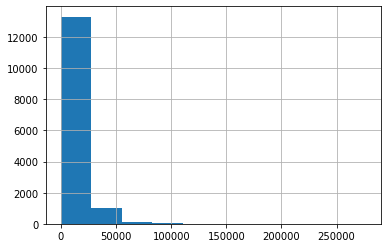

In [ ]:
df['ingtot_2'].hist()

In [ ]:
df['ingtot_2'].describe()

count     14512.000000
mean      10386.681850
std       13396.598595
min           0.000000
25%           0.000000
50%        7000.000000
75%       15000.000000
max      276000.000000
Name: ingtot_2, dtype: float64

$ingtot=\beta_0+\beta_1 aesc +\epsilon$

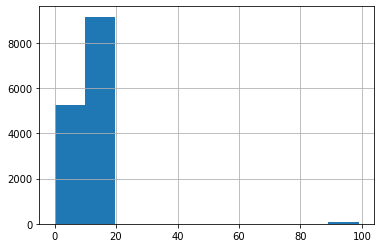

In [ ]:
df['aesc'].hist()

In [ ]:
df=df.loc[df['aesc']!=99]

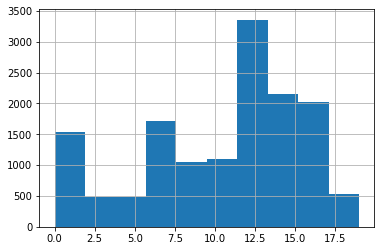

In [ ]:
df['aesc'].hist()

In [ ]:
def regress(lista, data):
  """ 
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [ ]:
misresultados=regress(['ingtot_2','aesc'],data=df)

                            OLS Regression Results                            
Dep. Variable:               ingtot_2   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     5048.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:58:10   Log-Likelihood:            -1.5567e+05
No. Observations:               14450   AIC:                         3.113e+05
Df Residuals:                   14448   BIC:                         3.114e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3138.4311    213.503    -14.700      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
prediccion_ingreso=misresultados.predict()

In [ ]:
residuos_estimados=df['ingtot_2']-prediccion_ingreso

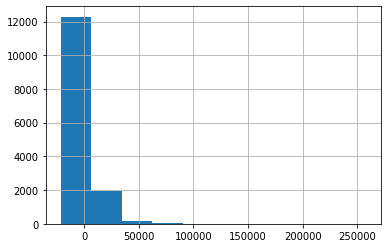

In [ ]:
residuos_estimados.hist()

In [ ]:
def regress(lista, data):
  """ 
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [ ]:
resultados.params['aesc']

0.10108264507335257

In [ ]:
resultados.predict()

array([9.22474507, 9.22474507, 9.22474507, ..., 8.41608391, 9.22474507,
       9.12366242])

# Predicción

$\hat{Y}=\hat{\beta_0}+\hat{\beta_1}*X$

In [ ]:
# 10 años de escolaridad
8.0118+0.1011*10

9.022799999999998

In [ ]:
# 10 años de escolaridad levantando los parametros de los resultados del ajuste
resultados.params['const']+resultados.params['aesc']*10

9.02257977872712

In [ ]:
# Predicciones para observaciones en la data
resultados.params['const']+resultados.params['aesc']*df.aesc

0        9.224745
1        9.224745
2        9.224745
3        9.224745
4        9.224745
           ...   
14507    8.820414
14508    9.527993
14509    8.416084
14510    9.224745
14511    9.123662
Name: aesc, Length: 10082, dtype: float64

In [ ]:
resultados.predict()

array([9.22474507, 9.22474507, 9.22474507, ..., 8.41608391, 9.22474507,
       9.12366242])

In [ ]:
df.logingreso-resultados.predict()

0       -0.839941
1       -0.119765
2       -0.742143
3        0.391060
4        0.391060
           ...   
14507   -0.072110
14508    0.424285
14509    0.794256
14510   -0.302087
14511    0.066475
Name: logingreso, Length: 10082, dtype: float64

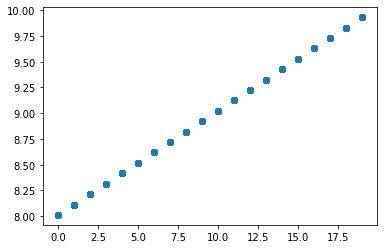

In [ ]:
# Ploteamos prediccion con matplolib
plt.scatter(df.aesc, resultados.predict())

(0.0, 15.0)

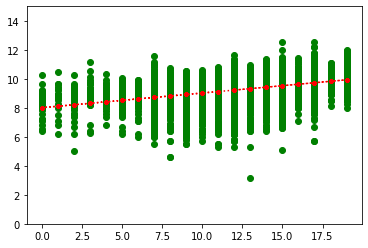

In [ ]:
plt.scatter(df.aesc, df.logingreso, color='green')

plt.plot(df.aesc, resultados.predict(), color= "red", marker='.', linestyle=':')

plt.ylim(0,15)


# Caso 2: Alquileres




In [ ]:
departamentos=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true")